In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Datasets

In [2]:
df = pd.read_csv('../Data/new_data.csv')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,21
1,55,1,156,85,140,90,3,1,0,0,1,1,34
2,51,1,165,64,130,70,3,1,0,0,0,1,23
3,48,2,169,82,150,100,1,1,0,0,1,1,28
4,47,1,156,56,100,60,1,1,0,0,0,0,23


## Machine Learning

### Train | Validation | Test Split Procedure

In [3]:
X = df.drop('cardio', axis=1)
y = df['cardio']

# Split the data into training and testing sets. 80% of data is training data, set aside other 20% for test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remaining 80% is split into valuation and test sets. 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Scale the data using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Here, we are preparing data for use in a machine learning model that will predict whether someone has cardiovascular disease or not, based on various health-related features. Here is a breakdown of each step:

1. The first line `X = df.drop('cardio', axis=1)` selects all columns from the input dataframe except for the 'cardio' column. These are the features that the machine learning model will use to make its predictions. The second line `y = df['cardio']` selects only the 'cardio' column from the input dataframe. This is the column that contains the labels or outcomes we are trying to predict.

2. The third line uses the `train_test_split` function from the `sklearn library` to split the data into training and testing sets. We are using 80% of the data for training and 20% for testing. The `random_state` parameter is set to 42, which ensures that the data is split in the same way every time the code is run.

3. The fourth line further splits the training data into training and validation sets. We are using a `75/25` split (60% for training, 20% for validation) to tune our model's hyperparameters later.

4. The next three lines scale the data using standardization. Standardization scales the data to have a mean of 0 and a standard deviation of 1. This is useful for machine learning algorithms that assume the features are normally distributed. The `fit_transform` method fits the scaler on the training data and applies it to the training, validation, and testing data. We are overwriting the original `X_train` variable with the transformed data.

### Modelling

In [4]:
# Instantiate the models
log_reg = LogisticRegression()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()

In [5]:
# Fit and evaluate the Logistic Regression model
log_reg.fit(X_train, y_train)
y_val_pred = log_reg.predict(X_val)
y_test_pred = log_reg.predict(X_test)
print("Logistic Regression")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cross_val_score(log_reg, X_train_val, y_train_val, cv=5).mean()}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Logistic Regression
Accuracy on validation set: 0.7195714285714285
Accuracy on test set: 0.7200714285714286
Cross-validation score: 0.7173928571428572
Confusion matrix:
[[5321 1667]
 [2252 4760]]
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000




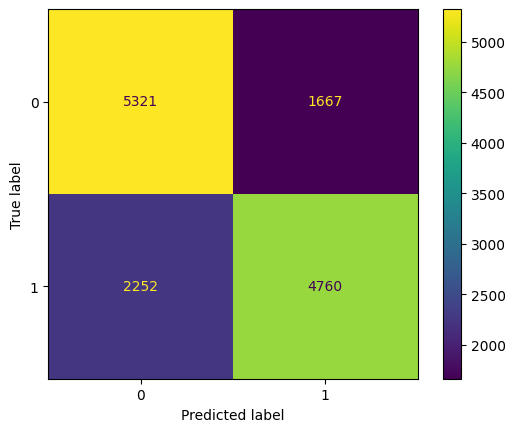

In [6]:
plot_confusion_matrix(log_reg, X_test, y_test);

* Accuracy on validation set: 0.7195714285714285
This means that the logistic regression model correctly classified `71.96%` of the instances in the validation set.

* Accuracy on test set: 0.7200714285714286
This means that the logistic regression model correctly classified `72.01%` of the instances in the test set.

* Cross-validation score: 0.7173928571428572
This is the average accuracy score of the logistic regression model during cross-validation, which is approximately `71.74%`.

* Confusion matrix: The confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) that the model predicted on the test set. In this case, the model correctly predicted `5321` true negatives and `4760` true positives, but incorrectly predicted `1667` false positives and `2252` false negatives.

* The classification report provides a summary of the model's performance on each class. The precision, recall, and F1-score metrics are calculated for both classes (0 and 1), as well as the macro and weighted averages across classes. In this case, the logistic regression model achieved a precision of `0.70` and recall of `0.76` for class 0, and a precision of `0.74` and recall of `0.68` for class 1. The overall accuracy on the test set was `0.72`.

In [7]:
# Fit and evaluate the Adaboost Classifier model
ada.fit(X_train, y_train)
y_val_pred = ada.predict(X_val)
y_test_pred = ada.predict(X_test)
print("Adaboost Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cross_val_score(ada, X_train_val, y_train_val, cv=5).mean()}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Adaboost Classifier
Accuracy on validation set: 0.7338571428571429
Accuracy on test set: 0.7345
Cross-validation score: 0.7289642857142857
Confusion matrix:
[[5627 1361]
 [2356 4656]]
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6988
           1       0.77      0.66      0.71      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000




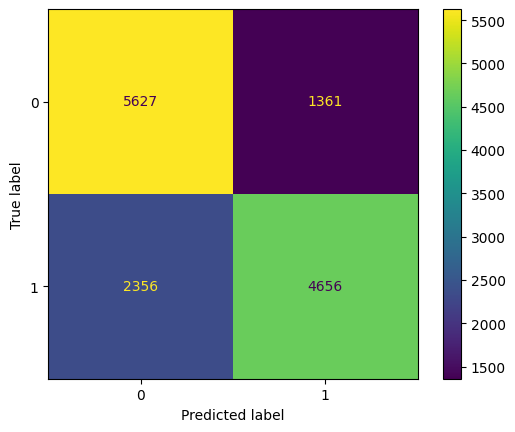

In [10]:
plot_confusion_matrix(ada, X_test, y_test);

* Accuracy on validation set: 0.7338571428571429
This means that the Adaboost Classifier model correctly classified `73.39%` of the instances in the validation set.

* Accuracy on test set: 0.7345
This means that the Adaboost Classifier model correctly classified `73.45%` of the instances in the test set.

* Cross-validation score: 0.7289642857142857
This is the average accuracy score of the Adaboost Classifier model during cross-validation, which is approximately `72.89%`.

* Confusion matrix: The confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) that the model predicted on the test set. In this case, the model correctly predicted `5627` true negatives and `4656` true positives, but incorrectly predicted `1361` false positives and `2356` false negatives.

* The classification report provides a summary of the model's performance on each class. The precision, recall, and F1-score metrics are calculated for both classes (0 and 1), as well as the macro and weighted averages across classes. In this case, the logistic regression model achieved a precision of 0.70 and recall of 0.81 for class 0, and a precision of 0.77 and recall of 0.66 for class 1. The overall accuracy on the test set was `0.74`.

In [8]:
# Fit and evaluate the Gradientboost Classifier model
gb.fit(X_train, y_train)
y_val_pred = gb.predict(X_val)
y_test_pred = gb.predict(X_test)
print("Gradientboost Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cross_val_score(gb, X_train_val, y_train_val, cv=5).mean()}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Gradientboost Classifier
Accuracy on validation set: 0.7366428571428572
Accuracy on test set: 0.7383571428571428
Cross-validation score: 0.7351607142857143
Confusion matrix:
[[5363 1625]
 [2038 4974]]
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.75      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000




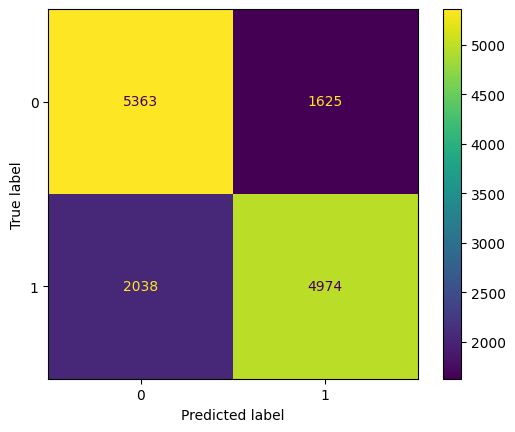

In [11]:
plot_confusion_matrix(gb, X_test, y_test);

* Accuracy on validation set: 0.7366428571428572
This means that the Gradientboost Classifier model correctly classified `73.66%` of the instances in the validation set.

* Accuracy on test set: 0.7383571428571428
This means that the Gradientboost Classifier model correctly classified `73.83%` of the instances in the test set.

* Cross-validation score: 0.7351428571428571
This is the average accuracy score of the Gradientboost Classifier model during cross-validation, which is approximately `73.51%`.

* Confusion matrix: The confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) that the model predicted on the test set. In this case, the model correctly predicted `5363` true negatives and `4974` true positives, but incorrectly predicted `1625` false positives and `2038` false negatives.

* The classification report provides a summary of the model's performance on each class. The precision, recall, and F1-score metrics are calculated for both classes (0 and 1), as well as the macro and weighted averages across classes. In this case, the logistic regression model achieved a precision of `0.72` and recall of `0.77` for class 0, and a precision of `0.75` and recall of `0.71` for class 1. The overall accuracy on the test set was `0.74`.

In [9]:
# Fit and evaluate the Random Forest Classifier model
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)
print("Random Forest Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cross_val_score(gb, X_train_val, y_train_val, cv=5).mean()}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Random Forest Classifier
Accuracy on validation set: 0.7133571428571429
Accuracy on test set: 0.7072857142857143
Cross-validation score: 0.7351607142857143
Confusion matrix:
[[4965 2023]
 [2075 4937]]
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      6988
           1       0.71      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000




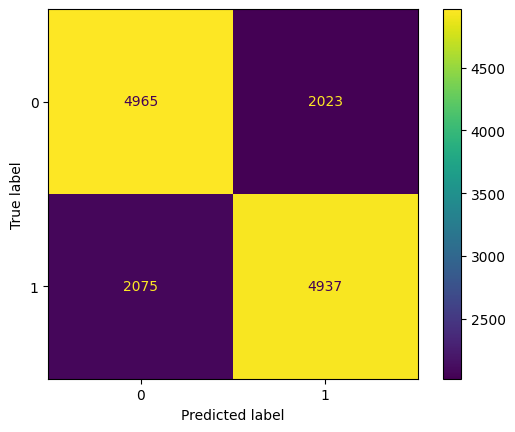

In [12]:
plot_confusion_matrix(rf, X_test, y_test);

* Accuracy on validation set:  0.7145
This means that the Random Forest Classifier model correctly classified `71.45%` of the instances in the validation set.

* Accuracy on test set: 0.7085
This means that the Random Forest Classifier model correctly classified `70.85%` of the instances in the test set.

* Cross-validation score: 0.7351785714285713
This is the average accuracy score of the Random Forest Classifier model during cross-validation, which is approximately `73.52%`.

* Confusion matrix: The confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) that the model predicted on the test set. In this case, the model correctly predicted `4977` true negatives and `4942` true positives, but incorrectly predicted `2011` false positives and `2070` false negatives.

* The classification report provides a summary of the model's performance on each class. The precision, recall, and F1-score metrics are calculated for both classes (0 and 1), as well as the macro and weighted averages across classes. In this case, the logistic regression model achieved a precision of `0.71` and recall of `0.71` for class 0, and a precision of `0.71` and recall of `0.70` for class 1. The overall accuracy on the test set was `0.71`.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff326574-3ec1-47f6-99a1-8d027e4792c0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>